# 주식 데이터 분석

In [10]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings(action = 'ignore')

데이터 수집

In [11]:
df = pd.read_csv('stock.adj_close.csv')
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 569 entries, Symbol to 2020-09-18
dtypes: float64(568), object(1)
memory usage: 9.9+ MB


결측치 처리

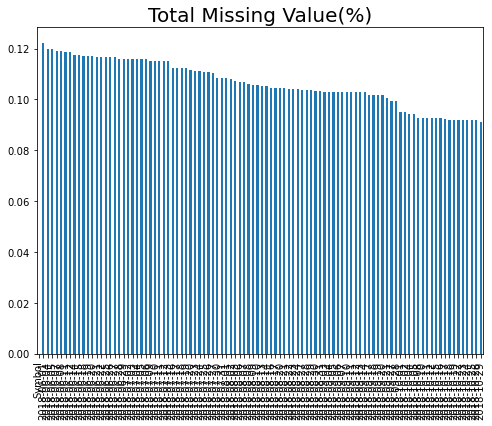

In [12]:
df.isnull()

total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
percent_data = percent.head(100)
percent_data.plot(kind = 'bar', figsize=(8,6), fontsize=10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value(%)", fontsize=20)
plt.show()

df = df.dropna()

데이터 전처리 

In [13]:
df = df.rename({'Symbol':''}, axis='columns')
df = df.set_index('')
print(df)
df = np.transpose(df)
print(df)
df = df.to_csv('stock.adj_close.csv1')

         2018-06-01  2018-06-04  2018-06-05  2018-06-07  2018-06-08  \
                                                                      
A000020     11550.0     11750.0     11700.0     11650.0     11500.0   
A000030     15500.0     15950.0     16050.0     16500.0     16600.0   
A000040      2992.0      3021.0      3025.0      3069.0      3045.0   
A000050     13200.0     13550.0     13600.0     13800.0     13800.0   
A000060     20050.0     20050.0     20150.0     20050.0     20400.0   
...             ...         ...         ...         ...         ...   
A950110      7690.0      7700.0      7690.0      7680.0      7680.0   
A950130      4970.0      4900.0      4940.0      5140.0      5280.0   
A950140      6530.0      6870.0      6690.0      6950.0      6740.0   
A950160     38600.0     36400.0     36350.0     38700.0     40200.0   
A950170     13850.0     14250.0     14450.0     14300.0     14150.0   

         2018-06-11  2018-06-12  2018-06-14  2018-06-15  2018-06-18  ...  \


ARIMA 모델 적용: 모수 구하기

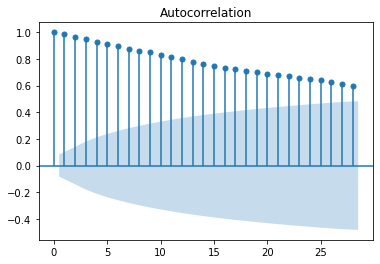

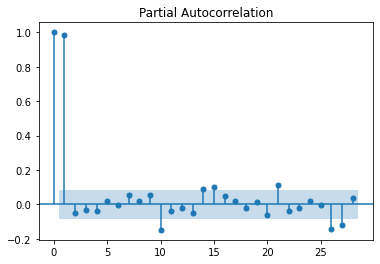

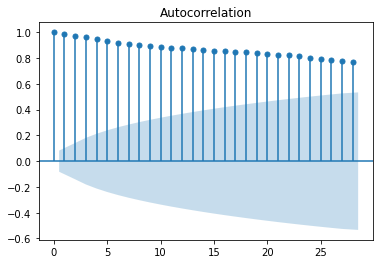

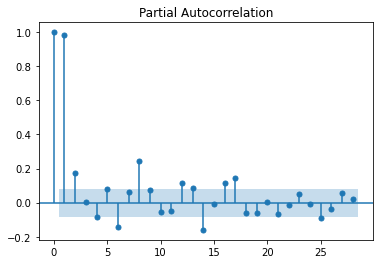

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [17]:
df = pd.read_csv('stock.adj_close.csv1', index_col=0)

rows = []

for column_name in df:
    rows.append(column_name)
df1 = pd.DataFrame(data=rows, columns=['Symbol'])

for s in df1['Symbol']:
    plot_acf(df[s])
    plot_pacf(df[s])
    plt.show()

ARIMA 모델 적용: 예측하기

                             ARIMA Model Results                              
Dep. Variable:              D.A000020   No. Observations:                  567
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4346.445
Method:                       css-mle   S.D. of innovations            516.330
Date:                Mon, 26 Apr 2021   AIC                           8698.889
Time:                        17:55:39   BIC                           8711.910
Sample:                             1   HQIC                          8703.971
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.8095     22.748      1.047      0.295     -20.775      68.394
ma.L1.D.A000020     0.0491      0.040      1.243      0.214      -0.028       0.127
                                

(array([64303.39391684]), array([1900.57909299]), array([[60578.32734482, 68028.46048887]]))
                             ARIMA Model Results                              
Dep. Variable:              D.A000080   No. Observations:                  567
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4450.473
Method:                       css-mle   S.D. of innovations            620.310
Date:                Mon, 26 Apr 2021   AIC                           8906.945
Time:                        17:55:40   BIC                           8919.966
Sample:                             1   HQIC                          8912.027
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.3651     26.008      1.129      0.259     -21.611      80.341
ma.L1.D.A000080    -0.0

(array([48740.39488566]), array([1844.79753722]), array([[45124.65815394, 52356.13161738]]))
                             ARIMA Model Results                              
Dep. Variable:              D.A000180   No. Observations:                  567
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2918.386
Method:                       css-mle   S.D. of innovations             41.601
Date:                Mon, 26 Apr 2021   AIC                           5842.771
Time:                        17:55:41   BIC                           5855.792
Sample:                             1   HQIC                          5847.853
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2112      1.675     -1.320      0.187      -5.494       1.071
ma.L1.D.A000180    -0.0

-----------------------------------------------------------------------------


KeyboardInterrupt: 

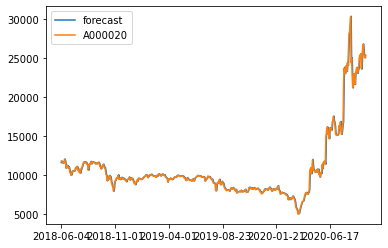

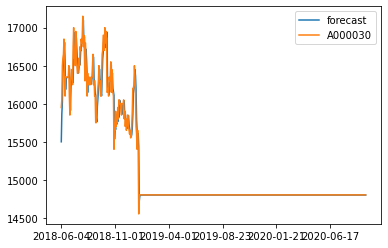

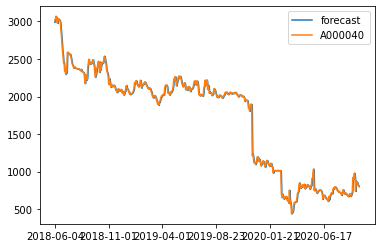

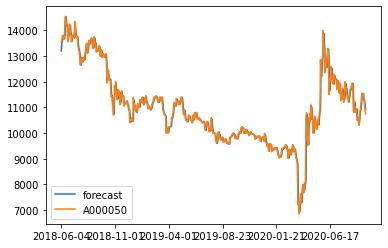

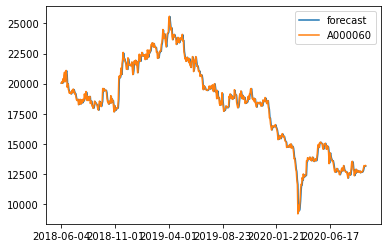

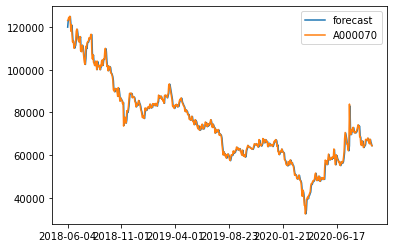

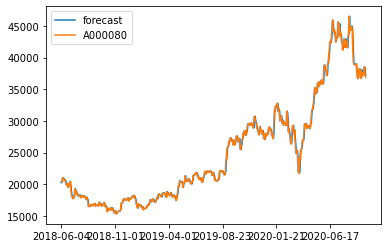

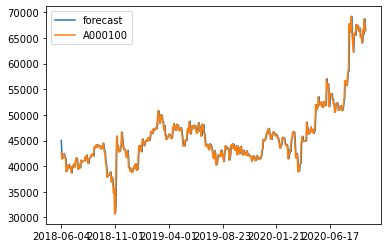

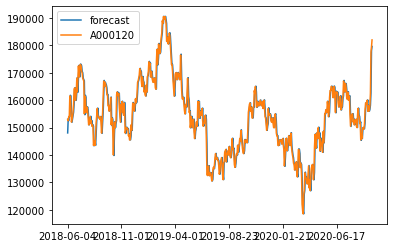

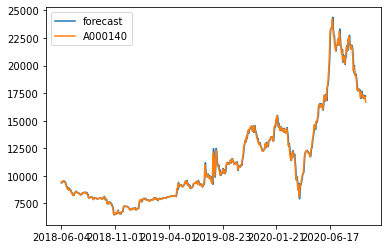

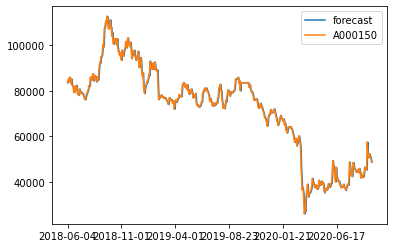

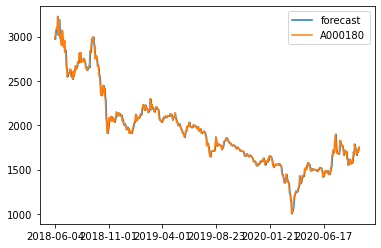

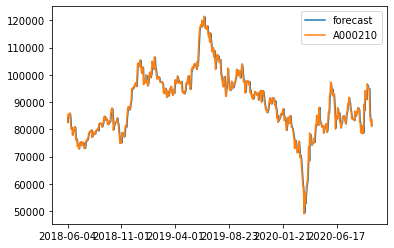

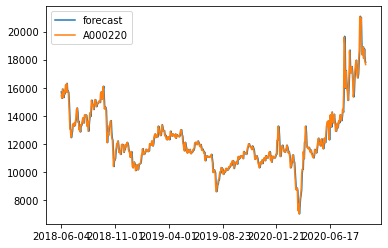

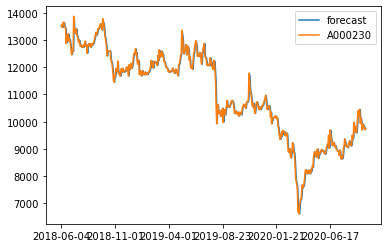

<Figure size 432x288 with 0 Axes>

In [18]:
for s in df1['Symbol']:   
    model = ARIMA(df[s], order=(0,1,1))
    model_fit = model.fit(trend='c',full_output=True, disp=1)
    print(model_fit.summary())
    model_fit.plot_predict()
    fore = model_fit.forecast(steps=1)
    print(fore)

In [19]:
# array 모으기
# (가장 마지막 수 - 예측값) 가장 큰 수 variable 5개 구하고 출력 

SyntaxError: invalid syntax (<ipython-input-19-a8f51ba0b7c6>, line 1)